In [2]:
import numpy as np
import scipy
import scipy.optimize as opt
from scipy.interpolate import interp1d
import matplotlib
import math
import matplotlib.pyplot as plt

# Experiment 3.1

In [117]:
lens_b_focus = 15.1
lens_d_distance_object = np.linspace(18.9, 18.9, 6)
lens_b_distance_image = np.array([37.9, 28.8, 44.35, 32.15, 45.7, 30.6])
d_b = np.array([16.4, 23.7, 14.2, 20.1, 13.9, 21.7])

In [118]:
lens_b_distance_object = 1/(1/lens_b_focus - 1/lens_b_distance_image)
lens_b_distance_object

array([25.1004386 , 31.74306569, 22.89521368, 28.47302053, 22.55130719,
       29.81032258])

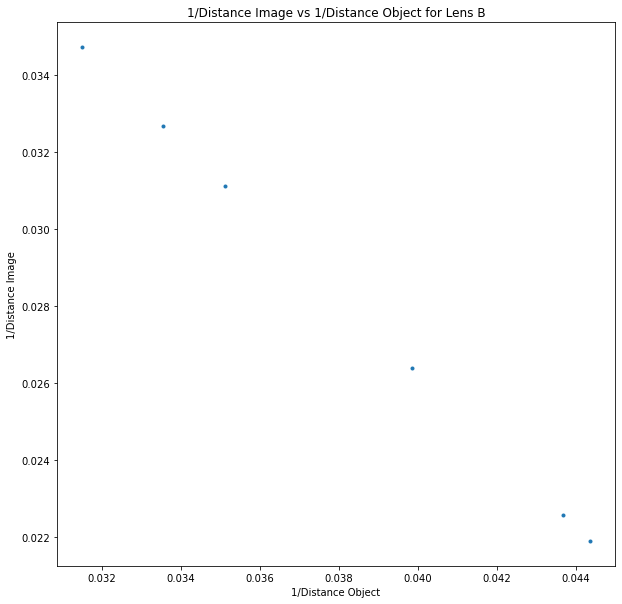

Covariance matrix is [[ 2.92396041e-05 -2.92396041e-05]
 [-2.92396041e-05  2.92396041e-05]]
Covariance is -2.923960409092274e-05
Coefficient of linear correlation is -1.2000000000000002


In [119]:
fig, ax = plt.subplots(figsize=(10, 10))
x_b = 1/lens_b_distance_object
y_b = 1/lens_b_distance_image
plt.scatter(x_b,y_b, marker = '.')
matrix = np.stack((x_b, y_b), axis=0)
covariance=np.cov(matrix)
plt.xlabel('1/Distance Object')
plt.ylabel('1/Distance Image')
plt.title('1/Distance Image vs 1/Distance Object for Lens B')
plt.show()

print('Covariance matrix is', covariance)
print('Covariance is', covariance[0][1])
print('Coefficient of linear correlation is',covariance[0][1]/(np.std(x_b)*np.std(y_b)))
#Well supported data

In [120]:
lens_d_distance_image = d_b-lens_b_distance_object
lens_d_distance_image


array([-8.7004386 , -8.04306569, -8.69521368, -8.37302053, -8.65130719,
       -8.11032258])

In [121]:
focus = 1/(1/lens_d_distance_object+1/lens_d_distance_image)
focus

array([-16.12209417, -14.00155305, -16.10416262, -15.03281054,
       -15.95420108, -14.20664315])

# Experiment 3.2

In [122]:
i_distance = np.array([23.5, 23.4, 23.7, 23.5, 23.5])
o_distance = np.array([18.9, 19, 19.1, 18.9, 18.9])
radius = 2/(1/i_distance+1/o_distance)
print("Radius of curvature is", np.round(np.mean(radius), 2))

Radius of curvature is 21.0


# Experiment 1

In [123]:
def ex3model(x, B):
    return -x+B

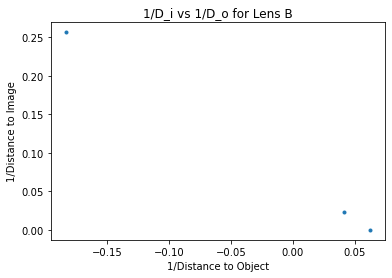

Covariance matrix is [[ 0.01860618 -0.01935348]
 [-0.01935348  0.02013126]]
Covariance is -0.01935347776251214
Coefficient of linear correlation is -1.499982493183927


In [151]:
distance_object = np.array([24, -5.45, 16])
distance_image = np.array([43.5, 3.9, -20588.6])
x = 1/distance_object
y= 1/distance_image
matrix = np.stack((x, y), axis=0)
covariance=np.cov(matrix)
plt.scatter(x,y, marker = '.')
plt.xlabel('1/Distance to Object')
plt.ylabel('1/Distance to Image')
plt.title('1/D_i vs 1/D_o for Lens B')
plt.show()
print('Covariance matrix is', covariance)
print('Covariance is', covariance[0][1])
print('Coefficient of linear correlation is',covariance[0][1]/(np.std(x)*np.std(y)))
#Well supported data

In [154]:
y_errors=np.array([1.3, 1.2, 1])
x_errors=np.array([1.1, 1.1, 1])

alpha_eqv_i=np.sqrt(y_errors**2+x_errors**2)
print('Error after removing x', alpha_eqv_i)




Error after removing x [1.70293864 1.62788206 1.41421356]


In [155]:
weights = 1/alpha_eqv_i**2
sum_ofx=sum(weights*x)
sum_ofy=sum(weights*y)
sum_of_weights=sum(weights)
best_fit=(sum_ofx+sum_ofy)/sum_of_weights
print('Best fit:',best_fit)
print('uncertainties for our best fit:', 1/np.sqrt(sum_of_weights))

#Best fit is actually the focal length. 
print('Focal length is', np.round(1/best_fit, 1),'+-', np.round(1/np.sqrt(sum_of_weights),1), 'cm')

#Checking with scipy
popt, pcov = scipy.optimize.curve_fit(ex3model, x, y)
print('best-fit parameters: ', popt)

Best fit: 0.06630667834282143
uncertainties for our best fit: 0.9045474091709342
Focal length is 15.1 +- 0.9 cm
best-fit parameters:  [0.06667687]
